# **Práctica 4**

**Integrantes:**  

*   Gallardo Rosales Sofía
*   Salgado Islas Sergio

1. Programar los métodos de:
*   Bisección.
*   Secante.
*   Newton.
*   Regla Falsa.

Para cada caso, pedir los datos entrada correspondientes: función punto(s) inicial(es), tolerancia, etc. Devolver la raíz si la encuentra, si no desplegar el mensaje donde se diga qué ocurrió. Entregar los códigos de cada método.
[Computacional].


In [4]:
import sympy as sp

def biseccion_metodo(func_str, a, b, tol, max_iter):
    # Definimos el símbolo de la variable independiente
    x = sp.symbols('x')
    # Convertimos la cadena de texto de la función a una expresión simbólica
    f = sp.sympify(func_str)

    # Creamos una función evaluable a partir de la expresión simbólica
    f_x = sp.lambdify(x, f, 'numpy')

    # Evaluamos la función en los puntos iniciales
    fa = f_x(a)
    fb = f_x(b)

    if fa * fb > 0:
        return "Error: La función no cambia de signo en el intervalo dado [a, b]."

    # Inicializamos un contador
    i = 0

    while i < max_iter:
        # Calculamos el punto medio
        c = (a + b) / 2
        fc = f_x(c)

        # Comprobamos si la diferencia entre las aproximaciones sucesivas es menor que la tolerancia
        if abs(fc) < tol or abs(b - a) < tol:
            return c

        # Actualizamos los valores de a y b para la siguiente iteración
        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc

        i += 1

    # Si se alcanzó el número máximo de iteraciones sin encontrar una raíz, devolvemos un mensaje de error
    return "Error: No se encontró la raíz en el número máximo de iteraciones."

# Ejemplo de uso
# Solicitamos al usuario que introduzca la función, los valores iniciales, la tolerancia y el número máximo de iteraciones
func_str = input("Introduce la función f(x): ").replace('^', '**')
a = float(input("Introduce el valor inicial a: "))
b = float(input("Introduce el valor inicial b: "))
tol = float(input("Introduce la tolerancia: "))
max_iter = int(input("Introduce el número máximo de iteraciones: "))

# Llamamos al método de la bisección y mostramos el resultado
raiz = biseccion_metodo(func_str, a, b, tol, max_iter)
print("La raíz encontrada es:", raiz)


Introduce la función f(x): x**2 - 4*sin(x)
Introduce el valor inicial a: -4
Introduce el valor inicial b: -3
Introduce la tolerancia: 0.00000001
Introduce el número máximo de iteraciones: 100
La raíz encontrada es: Error: La función no cambia de signo en el intervalo dado [a, b].


In [21]:
import sympy as sp

def secante_metodo(func_str, x0, x1, tol, max_iter):
    # Definimos el símbolo de la variable independiente
    x = sp.symbols('x')
    # Convertimos la cadena de texto de la función a una expresión simbólica
    f = sp.sympify(func_str)

    # Creamos una función evaluable a partir de la expresión simbólica
    f_x = sp.lambdify(x, f, 'numpy')

    for k in range(max_iter):
        # Evaluamos la función en los puntos actuales
        f_x0 = f_x(x0)
        f_x1 = f_x(x1)

        # Si la diferencia entre las evaluaciones es cero, no podemos continuar
        if f_x1 == f_x0:
            return "Error: División por cero, no se puede continuar."

        # Calculamos el siguiente valor de x utilizando el método de la secante
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)

        # Comprobamos si la diferencia entre las aproximaciones sucesivas es menor que la tolerancia
        if abs(x2 - x1) < tol:
            return x2

        # Actualizamos los valores para la siguiente iteración
        x0 = x1
        x1 = x2

    # Si se alcanzó el número máximo de iteraciones sin encontrar una raíz, devolvemos un mensaje de error
    return "Error: No se encontró la raíz en el número máximo de iteraciones."

# Ejemplo de uso
# Solicitamos al usuario que introduzca la función, los valores iniciales, la tolerancia y el número máximo de iteraciones
func_str = input("Introduce la función f(x): ").replace('^', '**')
x0 = float(input("Introduce el primer valor inicial x0: "))
x1 = float(input("Introduce el segundo valor inicial x1: "))
tol = float(input("Introduce la tolerancia: "))
max_iter = int(input("Introduce el número máximo de iteraciones: "))

# Llamamos al método de la secante y mostramos el resultado
raiz = secante_metodo(func_str, x0, x1, tol, max_iter)
print("La raíz encontrada es:", raiz)

Introduce la función f(x): x**2 - 4*sin(x)
Introduce el primer valor inicial x0: -3
Introduce el segundo valor inicial x1: -4
Introduce la tolerancia: 0.00000001
Introduce el número máximo de iteraciones: 100
La raíz encontrada es: -1.5374483029070543e-21


In [11]:
}import sympy as sp

def newton_metodo(func_str, x0, tol, max_iter):
    # Definimos el símbolo de la variable independiente
    x = sp.symbols('x')
    # Convertimos la cadena de texto de la función a una expresión simbólica
    f = sp.sympify(func_str)
    # Calculamos la derivada de la función
    f_deriv = sp.diff(f, x)

    # Creamos funciones evaluables a partir de las expresiones simbólicas
    f_x = sp.lambdify(x, f, 'numpy')
    f_deriv_x = sp.lambdify(x, f_deriv, 'numpy')

    for k in range(max_iter):
        # Evaluamos la función y su derivada en el punto actual
        f_x0 = f_x(x0)
        f_deriv_x0 = f_deriv_x(x0)

        # Si la derivada es cero, no podemos continuar
        if f_deriv_x0 == 0:
            return "Error: Derivada igual a cero, no se puede continuar."

        # Calculamos el siguiente valor de x utilizando el método de Newton
        x1 = x0 - f_x0 / f_deriv_x0

        # Comprobamos si la diferencia entre las aproximaciones sucesivas es menor que la tolerancia
        if abs(x1 - x0) < tol:
            return x1

        # Actualizamos el valor de x0 para la siguiente iteración
        x0 = x1

    # Si se alcanzó el número máximo de iteraciones sin encontrar una raíz, devolvemos un mensaje de error
    return "Error: No se encontró la raíz en el número máximo de iteraciones."

# Ejemplo de uso
# Solicitamos al usuario que introduzca la función, el valor inicial, la tolerancia y el número máximo de iteraciones
func_str = input("Introduce la función f(x): ").replace('^', '**')
x0 = float(input("Introduce el valor inicial x0: "))
tol = float(input("Introduce la tolerancia: "))
max_iter = int(input("Introduce el número máximo de iteraciones: "))

# Llamamos al método de Newton y mostramos el resultado
raiz = newton_metodo(func_str, x0, tol, max_iter)
print("La raíz encontrada es:", raiz)

Introduce la función f(x): x**2 - 4*sin(x)
Introduce el valor inicial x0: -3
Introduce la tolerancia: 0.00000001
Introduce el número máximo de iteraciones: 100
La raíz encontrada es: 1.9337537628270212


In [22]:
import sympy as sp

def regla_falsa_metodo(func_str, a, b, tol, max_iter):
    # Definimos el símbolo de la variable independiente
    x = sp.symbols('x')
    # Convertimos la cadena de texto de la función a una expresión simbólica
    f = sp.sympify(func_str)

    # Creamos una función evaluable a partir de la expresión simbólica
    f_x = sp.lambdify(x, f, 'numpy')

    # Evaluamos la función en los puntos iniciales
    fa = f_x(a)
    fb = f_x(b)

    if fa * fb > 0:
        return "Error: La función no cambia de signo en el intervalo dado [a, b]."

    for k in range(max_iter):
        # Calculamos el punto c utilizando la fórmula de la regla falsa
        c = b - fb * (b - a) / (fb - fa)
        fc = f_x(c)

        # Comprobamos si la diferencia entre las aproximaciones sucesivas es menor que la tolerancia
        if abs(fc) < tol:
            return c

        # Actualizamos los valores de a y b para la siguiente iteración
        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc

    # Si se alcanzó el número máximo de iteraciones sin encontrar una raíz, devolvemos un mensaje de error
    return "Error: No se encontró la raíz en el número máximo de iteraciones."

# Ejemplo de uso
# Solicitamos al usuario que introduzca la función, los valores iniciales, la tolerancia y el número máximo de iteraciones
func_str = input("Introduce la función f(x): ").replace('^', '**')
a = float(input("Introduce el valor inicial a: "))
b = float(input("Introduce el valor inicial b: "))
tol = float(input("Introduce la tolerancia: "))
max_iter = int(input("Introduce el número máximo de iteraciones: "))

# Llamamos al método de la regla falsa y mostramos el resultado
raiz = regla_falsa_metodo(func_str, a, b, tol, max_iter)
print("La raíz encontrada es:", raiz)


Introduce la función f(x): x**2 - 4*sin(x)
Introduce el valor inicial a: -3
Introduce el valor inicial b: -4
Introduce la tolerancia: 0.00000001
Introduce el número máximo de iteraciones: 100
La raíz encontrada es: Error: La función no cambia de signo en el intervalo dado [a, b].


2. Usar el Método de Bisección (programado) para encontrar la solución de las siguientes funciones con una tolerancia de $10^{-5}$.
*   $f(x)=x-2^{-x}$, para $0 \leq x \leq 1$.
*   $f(x)=e^x-x^2+3 x-2$, para $0 \leq x \leq 1$.
*   $f(x)=2 x \cos (2 x)-(x+1)^2$, para $-3 \leq x \leq-2$ y $-1 \leq x \leq 0$.
*   $f(x)=x \cos (x)-2 x^2+3 x-1$, para $0.2 \leq x \leq 0.3$ y $1.2 \leq x \leq 1.3$.

[Computacional].


In [5]:
# Definimos los parámetros de tolerancia y máximo de iteraciones
tolerancia = 1e-5
max_iter = 100

# Definimos las funciones y los intervalos
func_intervalos = [
    ("x - 2**(-x)", 0, 1),
    ("exp(x) - x**2 + 3*x - 2", 0, 1),
    ("2*x*cos(2*x) - (x+1)**2", -3, -2),
    ("2*x*cos(2*x) - (x+1)**2", -1, 0),
    ("x*cos(x) - 2*x**2 + 3*x - 1", 0.2, 0.3),
    ("x*cos(x) - 2*x**2 + 3*x - 1", 1.2, 1.3)
]

# Iteramos sobre cada función e intervalo para encontrar las raíces
resultados = []
for func, a, b in func_intervalos:
    raiz = biseccion_metodo(func, a, b, tolerancia, max_iter)
    resultados.append((func, a, b, raiz))

# Mostramos los resultados
for func, a, b, raiz in resultados:
    print(f"Función: {func}, Intervalo: [{a}, {b}], Raíz encontrada: {raiz}")



Función: x - 2**(-x), Intervalo: [0, 1], Raíz encontrada: 0.6411895751953125
Función: exp(x) - x**2 + 3*x - 2, Intervalo: [0, 1], Raíz encontrada: 0.25753021240234375
Función: 2*x*cos(2*x) - (x+1)**2, Intervalo: [-3, -2], Raíz encontrada: -2.1913070678710938
Función: 2*x*cos(2*x) - (x+1)**2, Intervalo: [-1, 0], Raíz encontrada: -0.7981605529785156
Función: x*cos(x) - 2*x**2 + 3*x - 1, Intervalo: [0.2, 0.3], Raíz encontrada: 0.29752807617187504
Función: x*cos(x) - 2*x**2 + 3*x - 1, Intervalo: [1.2, 1.3], Raíz encontrada: 1.256622314453125


3. Sea $f(x)=(x+2)(x+1)^2 x(x-1)^3(x-2)$, ¿para qué cero de $f$ el Método de Bisección converge cuando se aplican los intervalos siguientes para su búsqueda?,
*   $[-1.5,2.5]$
*   $[-0.5,2.4]$
*   $[-0.5,3]$
*   $[-3,-0.5]$

[Ejercicio].


Función: $f(x) = (x+2)(x+1)^2 x (x-1)^3 (x-2)$

## a) Intervalo [-1.5, 2.5]

1. **Iteración 1**:
   -  a = -1.5, b = 2.5
   -  $c = \frac{a + b}{2} = \frac{-1.5 + 2.5}{2} = 0.5$
   -  \begin{equation*}
        %
        \begin{split}
        %
        f(c) = f(0.5) &= (0.5+2)(0.5+1)^2 \cdot 0.5 \cdot (0.5-1)^3 \cdot (0.5-2) \\
        %
        &= 2.5 \cdot 1.5^2 \cdot 0.5 \cdot (-0.5)^3 \cdot (-1.5) \\
        %
        &= 2.5 \cdot 2.25 \cdot 0.5 \cdot (-0.125) \cdot (-1.5) \\
        %
        &= 2.5 \cdot 2.25 \cdot 0.5 \cdot 0.1875 \\
        %
        &= 0.52734375 > 0 \\
        % Producto punto: \times%
        \end{split}
        %
\end{equation*}


   Como $f(a) \cdot f(c) < 0$, la raíz está en [-1.5, 0.5].


.

2. **Iteración 2**:
   - $a = -1.5$, $b = 0.5$
   - $c = \frac{-1.5 + 0.5}{2} = -0.5$
   - \begin{equation*}
        %
        \begin{split}
        %
        f(c) = f(0.5) &=  (-0.5+2)(-0.5+1)^2 \cdot (-0.5) \cdot (-0.5-1)^3 \cdot (-0.5-2) \\
        %
        &= 1.5 \cdot 0.5^2 \cdot (-0.5) \cdot (-1.5)^3 \cdot (-2.5)) \\
        %
        &= 1.5 \cdot 0.25 \cdot (-0.5) \cdot (-3.375) \cdot (-2.5) \\
        %
        &= 0.52734375 > 0
        %
        \end{split}
        %
\end{equation*}

   Como $f(a) \cdot f(c) < 0$, la raíz está en [-0.5, 0.5].

**Iteración 3**:
   - $a = -0.5$, $b = 0.5$
   - $c = \frac{-0.5 + 0.5}{2} = 0$
   - $f(c) = f(0) = 0$

   Como $f(c) = 0$, hemos encontrado una raíz en $x = 0$.

Por lo tanto, en el intervalo [-1.5, 2.5], el método de bisección converge a $x = 0$.

## b) Intervalo [-0.5, 2.4]

 **Iteración 1**:
   - $a = -0.5$, $b = 2.4$
   - $c = \frac{a + b}{2} = \frac{-0.5 + 2.4}{2} = 0.95$
   - \begin{equation*}
        %
        \begin{split}
        %
       f(c) = f(0.95) &= (0.95+2)(0.95+1)^2 \cdot 0.95 \cdot (0.95-1)^3 \cdot (0.95-2) \\
        %
        & \approx 2.95 \cdot 1.95^2 \cdot 0.95 \cdot (-0.05)^3 \cdot (-1.05) \\
        %
        & \approx 2.95 \cdot 3.8025 \cdot 0.95 \cdot (-0.000125) \cdot (-1.05) \\
        %
        & \approx 0.00125531 > 0
        %
        \end{split}
        %
\end{equation*}

   Como $f(a) \cdot f(c) < 0$, la raíz está en [-0.5, 0.95].

**Iteración 2**:
   - $a = -0.5$, $b = 0.95$
   - $c = \frac{-0.5 + 0.95}{2} = 0.225$
   - \begin{equation*}
        %
        \begin{split}
        %
       f(c) =  f(0.225) &= (0.225+2)(0.225+1)^2 \cdot 0.225 \cdot (0.225-1)^3 \cdot (0.225-2) \\
        %
        & \approx  2.225 \cdot 1.225^2 \cdot 0.225 \cdot (-0.775)^3 \cdot (-1.775) \\
        %
        & \approx  2.225 \cdot 1.500625 \cdot 0.225 \cdot (-0.465484375) \cdot (-1.775) \\
        %
        & \approx  0.174384 > 0
        %
        \end{split}
        %
\end{equation*}



   Como $f(a) \cdot f(c) < 0$, la raíz está en [-0.5, 0.225].

 **Iteración 3**:
   - $a = -0.5$, $b = 0.225$
   - $c = \frac{-0.5 + 0.225}{2} = -0.1375$
   - \begin{equation*}
        %
        \begin{split}
        %
       f(c) = f(-0.1375) &= (-0.1375+2)(-0.1375+1)^2 \cdot (-0.1375) \cdot (-0.1375-1)^3 \cdot (-0.1375-2) \\
        %
        & \approx 1.8625 \cdot 0.8625^2 \cdot (-0.1375) \cdot (-1.1375)^3 \cdot (-2.1375) \\
        %
        & \approx   1.8625 \cdot 0.74390625 \cdot (-0.1375) \cdot (-1.47119140625) \cdot (-2.1375) \\
        %
        & \approx  -0.45065 < 0
        %
        \end{split}
        %
\end{equation*}

   Como $f(a) \cdot f(c) < 0$, la raíz está en [-0.1375, 0.225].

**Iteración 4**:
   - $a = -0.1375$, $b = 0.225$
   - $c = \frac{-0.1375 + 0.225}{2} = 0.04375$
   - \begin{equation*}
        %
        \begin{split}
        %
       f(c) = f(0.04375) &= (0.04375+2)(0.04375+1)^2 \cdot 0.04375 \cdot (0.04375-1)^3 \cdot (0.04375-2) \\
        %
        & \approx 2.04375 \cdot 1.04375^2 \cdot 0.04375 \cdot (-0.95625)^3 \cdot (-1.95625) \\
        %
        & \approx  2.04375 \cdot 1.08950390625 \cdot 0.04375 \cdot (-0.873443359375) \cdot (-1.95625) \\
        %
        & \approx  0.08582 > 0
        %
        \end{split}
        %
\end{equation*}


   Como $f(a) \cdot f(c) < 0$, la raíz está en [-0.1375, 0.04375].

**Iteración 5**:
   - $a = -0.1375$, $b = 0.04375$
   - $c = \frac{-0.1375 + 0.04375}{2} = -0.046875$
   -  \begin{equation*}
        %
        \begin{split}
        %
       f(c) =  f(-0.046875) &= (-0.046875+2)(-0.046875+1)^2 \cdot (-0.046875) \cdot (-0.046875-1)^3 \cdot (-0.046875-2) \\
        %
        & \approx 1.953125 \cdot 0.953125^2 \cdot (-0.046875) \cdot (-1.046875)^3 \cdot (-2.046875) \\
        %
        & \approx  1.953125 \cdot 0.9088134765625 \cdot (-0.046875) \cdot (-1.1517791748046875) \cdot (-2.046875) \\
        %
        & \approx  -0.07305 < 0
        %
        \end{split}
        %
\end{equation*}


   Como $f(a) \cdot f(c) < 0$, la raíz está en [-0.046875, 0.04375].

## c) Intervalo \([-0.5, 3]\)

**Iteración 1**:
- $a = -0.5$, $b = 3$
- $c = \frac{-0.5 + 3}{2} = 1.25$
- \begin{equation*}
        %
        \begin{split}
        %
       f(c) = f(1.25) &= (1.25+2)(1.25+1)^2 \cdot 1.25 \cdot (1.25-1)^3 \cdot (1.25-2) \\
        %
        & \approx 3.25 \cdot 2.25^2 \cdot 1.25 \cdot (0.25)^3 \cdot (-0.75) \\
        %
        & \approx 3.25 \cdot 5.0625 \cdot 1.25 \cdot 0.015625 \cdot (-0.75) \\
        %
        & \approx -0.9638671875 < 0
        %
        \end{split}
        %
  \end{equation*}


Dado que $f(a) \cdot f(c) < 0$, la raíz está en [-0.5, 1.25].

**Iteración 2**:
- $a = -0.5$, $b = 1.25$
- $c = \frac{-0.5 + 1.25}{2} = 0.375$
- \begin{equation*}
        %
        \begin{split}
        %
       f(c) = f(0.375) &= (0.375+2)(0.375+1)^2 \cdot 0.375 \cdot (0.375-1)^3 \cdot (0.375-2) \\
        %
        & = 2.375 \cdot 1.375^2 \cdot 0.375 \cdot (-0.625)^3 \cdot (-1.625) \\
        %
        & = 2.375 \cdot 1.890625 \cdot 0.375 \cdot -0.244140625 \cdot (-1.625) \\
        %
        & \approx 0.635 > 0
        %
        \end{split}
        %
\end{equation*}

Dado que $f(a) \cdot f(c) < 0$, la raíz está en [-0.5, 0.375].

**Iteración 3**:
- $a = -0.5$, $b = 0.375$
- $c = \frac{-0.5 + 0.375}{2} = -0.0625$
-  \begin{equation*}
        %
        \begin{split}
        %
       f(c) = f(-0.0625) &= (-0.0625+2)(-0.0625+1)^2 \cdot (-0.0625) \cdot (-0.0625-1)^3 \cdot (-0.0625-2) \\
        %
        & = 1.9375 \cdot 0.9375^2 \cdot (-0.0625) \cdot (-1.0625)^3 \cdot (-2.0625) \\
        %
        & =  1.9375 \cdot 0.87890625 \cdot (-0.0625) \cdot -1.198974609375 \cdot (-2.0625) \\
        %
        & \approx  0.0718 > 0
        %
        \end{split}
        %
\end{equation*}

Dado que $f(a) \cdot f(c) < 0$, la raíz está en [-0.5, -0.0625].

**Iteración 4**:
- $a = -0.5$, $b = -0.0625$
- $c = \frac{-0.5 + (-0.0625)}{2} = -0.28125$
- \begin{equation*}
        %
        \begin{split}
        %
       f(c) = f(-0.28125) = (-0.28125+2)(-0.28125+1)^2 \cdot (-0.28125) \cdot (-0.28125-1)^3 \cdot (-0.28125-2) \\
        %
        & = 1.71875 \cdot 0.71875^2 \cdot (-0.28125) \cdot (-1.28125)^3 \cdot (-2.28125) \\
        %
        & =  1.71875 \cdot 0.5166015625 \cdot (-0.28125) \cdot -2.099609375 \cdot (-2.28125) \\
        %
        & \approx   -0.074< 0
        %
        \end{split}
        %
\end{equation*}


Dado que $f(a) \cdot f(c) < 0$, la raíz está en [-0.28125, -0.0625].

**Iteración 5**:
- $a = -0.28125$, $b = -0.0625$
- $c = \frac{-0.28125 + (-0.0625)}{2} = -0.171875$
- \begin{equation*}
        %
        \begin{split}
        %
       f(c) = f(-0.171875) &= (-0.171875+2)(-0.171875+1)^2 \cdot (-0.171875) \cdot (-0.171875-1)^3 \cdot (-0.171875-2) \\
        %
        & \approx 1.828125 \cdot 0.828125^2 \cdot (-0.171875) \cdot -1.171875^3 \cdot (-2.171875) \\
        %
        & \approx 1.828125 \cdot 0.68505859375 \cdot (-0.171875) \cdot -1.60919189453125 \cdot (-2.171875) \\
        %
        & \approx    0.0708 > 0
        %
        \end{split}
        %
\end{equation*}


Dado que $f(a) \cdot f(c) < 0$, la raíz está en [-0.171875, -0.0625].

## d) Intervalo \([-3, -0.5]\)

**Iteración 1**:
- $a = -3$, $b = -0.5$
- $c = \frac{-3 + (-0.5)}{2} = -1.75$
- \begin{equation*}
        %
        \begin{split}
        %
       f(c) = f(-1.75) &= (-1.75+2)(-1.75+1)^2 \cdot (-1.75) \cdot (-1.75-1)^3 \cdot (-1.75-2) \\
        %
        & \approx 0.25 \cdot 0.25^2 \cdot (-1.75) \cdot -2.75^3 \cdot (-3.75)  \\
        %
        & \approx 0.25 \cdot 0.0625 \cdot (-1.75) \cdot -20.796875 \cdot (-3.75) \\
        %
        & \approx    1.72 > 0
        %
        \end{split}
        %
\end{equation*}


Dado que $f(a) \cdot f(c) < 0$, la raíz está en [-3, -1.75].

**Iteración 2**:
- $a = -3$, $b = -1.74$
- $c = \frac{-3 + (-1.75)}{2} = -2.375$
- \begin{equation*}
        %
        \begin{split}
        %
       f(c) = f(-2.375) &= (-2.375+2)(-2.375+1)^2 \cdot (-2.375) \cdot (-2.375-1)^3 \cdot (-2.375-2) \\
        %
        & \approx   -0.375 \cdot (-1.375)^2 \cdot (-2.375) \cdot -3.375^3 \cdot (-4.375)  \\
        %
        & \approx  -0.375 \cdot 1.890625 \cdot (-2.375) \cdot -38.44921875 \cdot (-4.375) \\
        %
        & \approx     2.77 > 0
        %
        \end{split}
        %
\end{equation*}



Dado que $f(a) \cdot f(c) < 0$, la raíz está en [-3, -2.375].

**Iteración 3**:
- $a = -3$, $b = -2.375$
- $c = \frac{-3 + (-2.375)}{2} = -2.6875$
- \begin{equation*}
        %
        \begin{split}
        %
       f(c) =  f(-2.6875) &= (-2.6875+2)(-2.6875+1)^2 \cdot  (-2.6875) \cdot (-2.6875-1)^3 \cdot (-2.6875-2) \\
        %
        & \approx   -0.6875 \cdot (-1.6875)^2 \cdot (-2.6875) \cdot -3.6875^3 \cdot (-4.6875)  \\
        %
        & \approx -0.6875 \cdot 2.84765625 \cdot (-2.6875) \cdot -50.11865234375 \cdot (-4.6875) \\
        %
        & \approx     3.95 > 0
        %
        \end{split}
        %
\end{equation*}


Dado que $f(a) \cdot f(c) < 0$, la raíz está en [-3, -2.6875].

**Iteración 4**:
- $a = -3$, $b = -2.6875$
- $c = \frac{-3 + (-2.6875)}{2} = -2.84375$
- \begin{equation*}
        %
        \begin{split}
        %
       f(c) =  f(-2.84375) &= (-2.84375+2)(-2.84375+1)^2 \cdot (-2.84375) \cdot (-2.84375-1)^3 \cdot (-2.84375-2) \\
        %
        & \approx -0.84375 \cdot (-1.84375)^2 \cdot (-2.84375) \cdot -4.84375^3 \cdot (-5.84375)  \\
        %
        & \approx -0.84375 \cdot 3.3994140625 \cdot (-2.84375) \cdot -56.8759765625 \cdot (-5.84375) \\
        %
        & \approx 6.23 > 0
        %
        \end{split}
        %
\end{equation*}


Dado que $f(a) \cdot f(c) < 0$, la raíz está en [-3, -2.84375].

**Iteración 5**:
- $a = -3$, $b = -2.84375$
- $c = \frac{-3 + (-2.84375)}{2} = -2.921875$
- \begin{equation*}
        %
        \begin{split}
        %
       f(c) = f(-2.921875) &= (-2.921875+2)(-2.921875+1)^2 \cdot (-2.921875) \cdot (-2.921875-1)^3 \cdot (-2.921875-2) \\
        %
        & \approx   -0.921875 \cdot (-1.921875)^2 \cdot (-2.921875) \cdot -4.921875^3 \cdot (-5.921875)  \\
        %
        & \approx  -0.921875 \cdot 3.692626953125 \cdot (-2.921875) \cdot -58.8369140625 \cdot (-5.921875) \\
        %
        & \approx     6.79 > 0
        %
        \end{split}
        %
\end{equation*}


Dado que $f(a) \cdot f(c) < 0$, la raíz está en [-3, -2.921875].


### Entonces:

- **Intervalo a) [-1.5, 2.5]**: El método de bisección converge a \( x = 0 \).
- **Intervalo b) [-0.5, 2.4]**: El método de bisección converge a \( x = 0 \) (primeras 5 iteraciones indican la misma convergencia).
- **Intervalo c) [-0.5, 3]**: El método de bisección converge a \( x = 1 \) (a partir de la tercera iteración).
- **Intervalo d) [-3, -0.5]**: El método de bisección converge a \( x = -2 \).


4. Hallar una aproximación a $\sqrt{3}$ con una tolerancia de $10^{-4}$ usando el algoritmo de Bisección. [Hint: considerar $f(x)=x^2-3$.]
siguientes funciones con una tolerancia de $10^{-5}$.
*   Escribir las primeras 5 iteraciones del método.
[Ejercicio].
*   Implementando el programa.
[Computacional].


Para encontrar una aproximación a $\sqrt{3}$ utilizando el método de bisección, podemos considerar la función $f(x) = x^2 - 3$. Queremos encontrar la raíz de esta función con una tolerancia de $10^{-4}$.

## a) Primeras 5 iteraciones del método

El intervalo inicial que podemos considerar es [1, 2], ya que $\sqrt{3}$ está entre 1 y 2.

### Iteración 1:
- $a = 1$, $b = 2$
- $c = \frac{1 + 2}{2} = 1.5$
- $f(c) = 1.5^2 - 3 = 2.25 - 3 = -0.75$

Dado que $f(1) \times f(1.5) < 0$, la raíz está en [1.5, 2].

### Iteración 2:
- $a = 1.5$, $b = 2$
- $c = \frac{1.5 + 2}{2} = 1.75$
- $f(c) = 1.75^2 - 3 = 3.0625 - 3 = 0.0625$

Dado que $f(1.5) \times f(1.75) < 0$, la raíz está en [1.5, 1.75].

### Iteración 3:
- $a = 1.5$, $b = 1.75$
- $c = \frac{1.5 + 1.75}{2} = 1.625$
- $f(c) = 1.625^2 - 3 = 2.640625 - 3 = -0.359375$

Dado que $f(1.5) \times f(1.625) < 0$, la raíz está en [1.625, 1.75].

### Iteración 4:
- $a = 1.625$, $b = 1.75$
- $c = \frac{1.625 + 1.75}{2} = 1.6875$
- $f(c) = 1.6875^2 - 3 = 2.84765625 - 3 = -0.15234375$

Dado que $f(1.625) \times f(1.6875) < 0$, la raíz está en [1.6875, 1.75].

### Iteración 5:
- $a = 1.6875$, $b = 1.75$
- $c = \frac{1.6875 + 1.75}{2} = 1.71875$
- $f(c) = 1.71875^2 - 3 = 2.9541015625 - 3 = -0.0458984375$

Dado que $f(1.6875) \times f(1.71875) < 0$, la raíz está en [1.71875, 1.75].


## b) Implementación del programa


In [8]:
# Definimos los parámetros
func_str = "x**2 - 3"
a = 1
b = 2
tolerancia = 1e-4
max_iter = 100

# Llamamos al método de bisección
raiz = biseccion_metodo(func_str, a, b, tolerancia, max_iter)
print(f"La raíz aproximada es: {raiz}")

La raíz aproximada es: 1.7320556640625


5. La función definida por $f(x)=\sin (\pi x)$ tiene ceros en todos los enteros. Muestre que cuando $-1 <a <0$ y $2<b<3$, el método de bisección converge a
*   a) 0 , si $a+b<2$.
*   b) 2 , si $a+b>2$.
*   c) 1 , si $a+b=2$.

[Ejercicio].

Función:  $f(x) = \sin(\pi x)$

Ceros en todos los enteros: $x = n$, donde $n$ es un entero.


## a) 0 si a + b < 2
**Intervalo inicial**:
   - $-1 < a < 0$
   - $2 < b < 3$
   - $a + b < 2$

Dividimos el intervalo [a, b] en dos partes iguales:
   $c = \frac{a + b}{2}$

Si $a + b < 2$, entonces $c < 1$.
  c está en el intervalo (a, b).
   - Si $f(a) \cdot f(c) < 0$, entonces la raíz está en [a, c].
   - Si $f(c) \cdot f(b) < 0$, entonces la raíz está en [c, b].

 En este caso, $c < 1$, y la raíz hacia la que converge el método de bisección es $x = 0$, porque $f(c) = \sin(\pi c)$ cambiará de signo en el intervalo [a, c], donde $a < 0 < c < 1$.

## b) 2 si $a + b > 2$
 **Intervalo inicial**:
   - $ -1 < a < 0$
   - $ 2 < b < 3$
   - $a + b > 2$
:
   Dividimos el intervalo [a, b] en dos partes iguales:
   $c = \frac{a + b}{2}$

Si $a + b > 2 $, entonces $c > 1$.

   - Si $ f(a) \cdot f(c) < 0$, entonces la raíz está en [a, c].
   - Si  $f(c) \cdot f(b) < 0$, entonces la raíz está en [c, b].

 En este caso, $ c > 1$, y la raíz hacia la que converge el método de bisección es $x = 2$, porque $f(c) = \sin(\pi c)$ cambiará de signo en el intervalo [c, b], donde $1 < c < 2 < b.

## c) 1 si $a + b = 2$
 **Intervalo inicial**:
   - $ -1 < a < 0$
   - $2 < b < 3$
   - $a + b = 2$

Dividimos el intervalo [a, b] en dos partes iguales:
  $c = \frac{a + b}{2}$

Si $a + b = 2$, entonces $c = 1$.
 En este caso, $f(c) = \sin(\pi c) = \sin(\pi \cdot 1) = \sin(\pi) = 0$.

Si  $a + b = 2$, el método de bisección converge directamente a  $x = 1$ en la primera iteración porque $c = 1$.

### Entonces:

- **a)  0, si  $a + b < 2$**:
   La raíz es  $x = 0$, ya que el método de bisección converge a 0 cuando $c < 1$.
- **b) 2, si $a + b > 2$**:
   La raíz es $x = 2$, ya que el método de bisección converge a  2 cuando $c > 1$.
- **c) 1, si $a + b = 2$**:
   La raíz es $x = 1$, ya que el método de bisección converge directamente a \( 1 \) cuando $c = 1$.

6. Sea la función $f(x)=x^4+2 x^2-x-3$
*   a) Manipulando la función $f$ da dos variantes de ella, de tal forma que se puede ver como una función $f(x)=g_i(x)-x$ de punto fijo para $i=1,2$.
*   b) De cada una de las funciones realizar 4 iteraciones del método de Punto Fijo con $x_0=1$.
*   c) Calcular la derivada de $g_i(x)$ y decir si el método eventualmente converge para éstas funciones.

### a) Manipulación de la función f para obtener $g_i(x)$ de punto fijo

Queremos manipular  $f(x)$ para obtener dos funciones $g_1(x)$ y $g_2(x)$ de tal forma que:
 $f(x) = g_i(x) - x$

Para esto, despejamos x en términos de $g(x)$:
$x = g_i(x)$

Sustituyendo, tenemos que:
$ x = x^4 + 2x^2 - x - 3 + x$
$g_1(x) = x^4 + 2x^2 - 3$

Otra manera de manipular la función es:
$x = \sqrt{\frac{x + 3}{2}}$
$g_2(x) = \sqrt{\frac{x + 3}{2}}$

### b) Realización de 4 iteraciones del método de Punto Fijo con $x_0 = 1$


In [41]:
import numpy as np

def punto_fijo(g_func, x0, max_iter):
    x = x0
    resultado = [x]
    for k in range(max_iter):
        x_s = g_func(x)
        resultado.append(x_s)
        x = x_s
    return resultado

# Definimos las funciones g1 y g2
def g1(x):
    return x**4 + 2*x**2 - 3

def g2(x):
    return np.sqrt((x + 3) / 2)

# Parámetros del problema
x0 = 1.0  # Valor inicial
max_iter = 4

# Realizamos la iteración de Punto Fijo para g1 y g2
iter_g1 = punto_fijo(g1, x0, max_iter)
iter_g2 = punto_fijo(g2, x0, max_iter)

print(f"Iteraciones para g1(x) = x^4 + 2x^2 - 3 con x0 = 1: {iter_g1}")
print(f"Iteraciones para g2(x) = sqrt((x + 3) / 2) con x0 = 1: {iter_g2}")


Iteraciones para g1(x) = x^4 + 2x^2 - 3 con x0 = 1: [1.0, 0.0, -3.0, 96.0, 84953085.0]
Iteraciones para g2(x) = sqrt((x + 3) / 2) con x0 = 1: [1.0, 1.4142135623730951, 1.4856334612503004, 1.4976036627309477, 1.4996005572703264]


### c) Cálculo de la derivada de g_i(x) y análisis de la convergencia

Calculamos las derivadas de $g_1(x)$ y $g_2(x)$ y analizamos si el método eventualmente converge para estas funciones.

1. Para $ g_1(x) = x^4 + 2x^2 - 3$:
$g_1'(x) = 4x^3 + 4x$

2. Para $g_2(x) = \sqrt{\frac{x + 3}{2}}$:
$g_2'(x) = \frac{1}{4\sqrt{\frac{x + 3}{2}}}$


El criterio de convergencia para el método de Punto Fijo es que $|g_i'(x)| < 1$ en el intervalo de interés.

1. Calculamos $ g_1'(1) = 4(1)^3 + 4(1) = 8$.
   Dado que $|g_1'(x)| = 8$, que es mayor que 1, el método no converge para $g_1(x)$.

2. Calculamos $g_2'(1) = \frac{1}{4\sqrt{\frac{1 + 3}{2}}} = \frac{1}{4\sqrt{2}} = \frac{1}{4\sqrt{2}} \approx 0.177$.
Dado que $|g_2'(1)| \approx 0.177$, que es menor que 1, el método converge para $g_2(x)$.


In [42]:
# Derivadas de g1 y g2
def g1_prime(x):
    return 4*x**3 + 4*x

def g2_prime(x):
    return 1 / (4 * np.sqrt((x + 3) / 2))

print(f"g1'(1) = {g1_prime(1)}")
print(f"g2'(1) = {g2_prime(1)}")

print(f"El método de Punto Fijo no converge para g1(x) porque |g1'(1)| > 1")
print(f"El método de Punto Fijo converge para g2(x) porque |g2'(1)| < 1")


g1'(1) = 8
g2'(1) = 0.17677669529663687
El método de Punto Fijo no converge para g1(x) porque |g1'(1)| > 1
El método de Punto Fijo converge para g2(x) porque |g2'(1)| < 1


7. Usar la iteración de Punto Fijo para mostrar que la función $g(x)=\pi+0.5 \sin (x / 2)$ tiene un punto fijo en el intervalo $[0,2 \pi]$ con una tolerancia de $10^{-2}$. (Programar el ejemplo en específico con una gráfica de la función).

[Computacional]


El punto fijo encontrado es: 3.6269823617156867 en 4 iteraciones


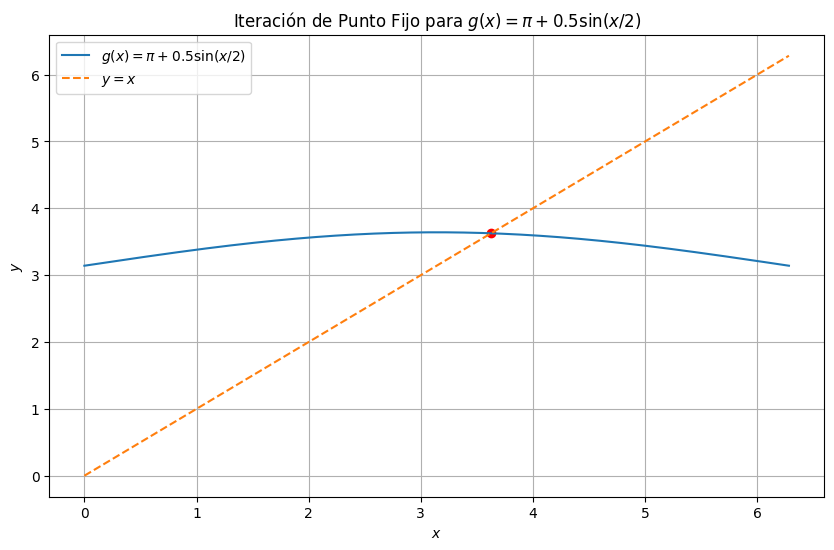

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def punto_fijo_metodo(g_func, x0, tol, max_iter):
    x = x0
    for k in range(max_iter):
        x_s = g_func(x)
        if abs(x_s - x) < tol:
            return x_s, k + 1
        x = x_s
    return x, max_iter

# Definimos la función g(x)
def g(x):
    return np.pi + 0.5 * np.sin(x / 2)

# Parámetros del problema
x0 = 1.0  # Valor inicial
tolerancia = 1e-2
max_iteraciones = 100

# Llamamos a la iteración de Punto Fijo
raiz, iteraciones = punto_fijo_metodo(g, x0, tolerancia, max_iteraciones)
print(f"El punto fijo encontrado es: {raiz} en {iteraciones} iteraciones")

# Graficamos la función g(x) y la línea y = x
x_val = np.linspace(0, 2 * np.pi, 400)
g_val = g(x_val)
id_val = x_val

plt.figure(figsize=(10, 6))
plt.plot(x_val, g_val, label='$g(x) = \\pi + 0.5 \\sin(x / 2)$')
plt.plot(x_val, id_val, label='$y = x$', linestyle='--')
plt.scatter(raiz, raiz, color='red')  # Punto fijo encontrado
plt.title('Iteración de Punto Fijo para $g(x) = \\pi + 0.5 \\sin(x / 2)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)
plt.show()


8. Mostrar las primeras 5 iteraciones del Método de Newton para hallar el cero de $f(x)=x^2-6$ con $x_0=1$.
[Ejercicio]


El Método de Newton se define por la fórmula de iteración:
   $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$
   donde $f(x) = x^2 - 6$ y su derivada $f'(x) = 2x$.
Y el punto inicial es: $x_0 = 1$

### Iteración 1:
- $x_0 = 1$
- $f(x_0) = 1^2 - 6 = -5$
- $f'(x_0) = 2 \cdot 1 = 2$
- $ x_1 = 1 - \frac{-5}{2 \cdot 1} = 1 + 2.5 = 3.5$

### Iteración 2:
- $x_1 = 3.5$
- $f(x_1) = 3.5^2 - 6 = 12.25 - 6 = 6.25$
- $f'(x_1) = 2 \cdot 3.5 = 7$
- $ x_2 = 3.5 - \frac{6.25}{7} = 3.5 - 0.8928571428571429 \approx 2.607142857142857$

### Iteración 3:
- $x_2 = 2.607142857142857$
- $f(x_2) = 2.607142857142857^2 - 6 = 6.796337099494437 - 6 = 0.796337099494437$
- $f'(x_2) = 2 \cdot 2.607142857142857 = 5.214285714285714$
- $ x_3 = 2.607142857142857 - \frac{0.796337099494437}{5.214285714285714} \approx 2.455832159502662$

### Iteración 4:
- $x_3 = 2.455832159502662$
- $f(x_3) = 2.455832159502662^2 - 6 = 6.030311371116592 - 6 = 0.03031137111659214$
- $f'(x_3) = 2 \cdot 2.455832159502662 = 4.911664319005324$
- $x_4 = 2.455832159502662 - \frac{0.03031137111659214}{4.911664319005324} \approx 2.4494943716069653$

### Iteración 5:
- $x_4 = 2.4494943716069653$
- $f(x_4) = 2.4494943716069653^2 - 6 = 6.000025522431968 - 6 = 0.000025522431968302065$
- $f'(x_4) = 2 \cdot 2.4494943716069653 = 4.898988743213931$
- $ x_5 = 2.4494943716069653 - \frac{0.000025522431968302065}{4.898988743213931} \approx 2.449489742783178$


9.Usar Newton para hallar la solución de las siguientes funciones con una tolerancia de $10^{-5}$ :
*   a) $f(x)=e^x+2^{-x}+2 \cos (x)-6=0$ para $1 \leq x \leq 2$.
*   b) $f(x)=2 x \cos (2 x)-(x-2)^2=0$ para $2 \leq x \leq 3$ y $3 \leq x \leq 4$.
*   c) $f(x)=e^x-3 x^2=0$ para $0 \leq x \leq 1$ y $3 \leq x \leq 5$.

[Computacional]



In [16]:
# Definimos los parámetros
func_a = "exp(x) + 2**(-x) + 2*cos(x) - 6"
x0_a = 1.5  # Un valor inicial dentro del intervalo [1, 2]
tolerancia = 1e-5
max_iter = 100

# Llamamos al método de Newton
raiz_a = newton_metodo(func_a, x0_a, tolerancia, max_iter)
print(f"La raíz encontrada para la función a) en el intervalo [1, 2] es: {raiz_a}")


La raíz encontrada para la función a) en el intervalo [1, 2] es: 1.829383601933849


In [15]:
# Definimos los parámetros para el primer intervalo [2, 3]
func_b = "2*x*cos(2*x) - (x-2)**2"
x0_b1 = 2.5  # Un valor inicial dentro del intervalo [2, 3]

# Llamamos al método de Newton
raiz_b1 = newton_metodo(func_b, x0_b1, tolerancia, max_iter)
print(f"La raíz encontrada para la función b) en el intervalo [2, 3] es: {raiz_b1}")

# Definimos los parámetros para el segundo intervalo [3, 4]
x0_b2 = 3.5  # Un valor inicial dentro del intervalo [3, 4]

# Llamamos al método de Newton
raiz_b2 = newton_metodo(func_b, x0_b2, tolerancia, max_iter)
print(f"La raíz encontrada para la función b) en el intervalo [3, 4] es: {raiz_b2}")


La raíz encontrada para la función b) en el intervalo [2, 3] es: 2.370686917662517
La raíz encontrada para la función b) en el intervalo [3, 4] es: 3.722112773106613


In [18]:
# Definimos los parámetros para el primer intervalo [0, 1]
func_c = "exp(x) - 3*x**2"
x0_c1 = 0.5  # Un valor inicial dentro del intervalo [0, 1]

# Llamamos al método de Newton
raiz_c1 = newton_metodo(func_c, x0_c1, tolerancia, max_iter)
print(f"La raíz encontrada para la función c) en el intervalo [0, 1] es: {raiz_c1}")

# Definimos los parámetros para el segundo intervalo [3, 5]
x0_c2 = 4  # Un valor inicial dentro del intervalo [3, 5]

# Llamamos al método de Newton
raiz_c2 = newton_metodo(func_c, x0_c2, tolerancia, max_iter)
print(f"La raíz encontrada para la función c) en el intervalo [3, 5] es: {raiz_c2}")


La raíz encontrada para la función c) en el intervalo [0, 1] es: 0.9100075724887138
La raíz encontrada para la función c) en el intervalo [3, 5] es: 3.733079028654685


10. Calcular las raíces del ejercicio 9 con el método de Secante.

[Computacional].


In [25]:
# Definimos los parámetros
func_a = "exp(x) + 2**(-x) + 2*cos(x) - 6"
x0_a = 1.0  # Un valor inicial dentro del intervalo [1, 2]
x1_a = 2.0  # Otro valor inicial dentro del intervalo [1, 2]
tolerancia = 1e-5
max_iter = 100

# Llamamos al método de la secante
raiz_a = secante_metodo(func_a, x0_a, x1_a, tolerancia, max_iter)
print(f"La raíz encontrada para la función a) en el intervalo [1, 2] es: {raiz_a}")


La raíz encontrada para la función a) en el intervalo [1, 2] es: 1.8293836019394727


In [27]:
# Definimos los parámetros para el primer intervalo [2, 3]
func_b = "2*x*cos(2*x) - (x-2)**2"
x0_b1 = 2.0  # Un valor inicial dentro del intervalo [2, 3]
x1_b1 = 3.0  # Otro valor inicial dentro del intervalo [2, 3]

# Llamamos al método de la secante
raiz_b1 = secante_metodo(func_b, x0_b1, x1_b1, tolerancia, max_iter)
print(f"La raíz encontrada para la función b) en el intervalo [2, 3] es: {raiz_b1}")

# Definimos los parámetros para el segundo intervalo [3, 4]
x0_b2 = 3.0  # Un valor inicial dentro del intervalo [3, 4]
x1_b2 = 4.0  # Otro valor inicial dentro del intervalo [3, 4]

# Llamamos al método de la secante
raiz_b2 = secante_metodo(func_b, x0_b2, x1_b2, tolerancia, max_iter)
print(f"La raíz encontrada para la función b) en el intervalo [3, 4] es: {raiz_b2}")


La raíz encontrada para la función b) en el intervalo [2, 3] es: 2.3706869176623
La raíz encontrada para la función b) en el intervalo [3, 4] es: 3.722112773420417


In [28]:
# Definimos los parámetros para el primer intervalo [0, 1]
func_c = "exp(x) - 3*x**2"
x0_c1 = 0.0  # Un valor inicial dentro del intervalo [0, 1]
x1_c1 = 1.0  # Otro valor inicial dentro del intervalo [0, 1]

# Llamamos al método de la secante
raiz_c1 = secante_metodo(func_c, x0_c1, x1_c1, tolerancia, max_iter)
print(f"La raíz encontrada para la función c) en el intervalo [0, 1] es: {raiz_c1}")

# Definimos los parámetros para el segundo intervalo [3, 5]
x0_c2 = 3.0  # Un valor inicial dentro del intervalo [3, 5]
x1_c2 = 5.0  # Otro valor inicial dentro del intervalo [3, 5]

# Llamamos al método de la secante
raiz_c2 = secante_metodo(func_c, x0_c2, x1_c2, tolerancia, max_iter)
print(f"La raíz encontrada para la función c) en el intervalo [3, 5] es: {raiz_c2}")


La raíz encontrada para la función c) en el intervalo [0, 1] es: 0.9100075715386231
La raíz encontrada para la función c) en el intervalo [3, 5] es: 3.7330790313204982


11. Calcular las raíces del ejercicio 9 con el método de Regla Falsa.

[Computacional].


In [29]:
# Definimos los parámetros
func_a = "exp(x) + 2**(-x) + 2*cos(x) - 6"
a_a = 1.0  # Límite inferior del intervalo
b_a = 2.0  # Límite superior del intervalo
tolerancia = 1e-5
max_iter = 100

# Llamamos al método de Regla Falsa
raiz_a = regla_falsa_metodo(func_a, a_a, b_a, tolerancia, max_iter)
print(f"La raíz encontrada para la función a) en el intervalo [1, 2] es: {raiz_a}")


La raíz encontrada para la función a) en el intervalo [1, 2] es: 1.8293827208408329


In [30]:
# Definimos los parámetros para el primer intervalo [2, 3]
func_b = "2*x*cos(2*x) - (x-2)**2"
a_b1 = 2.0  # Límite inferior del intervalo
b_b1 = 3.0  # Límite superior del intervalo

# Llamamos al método de Regla Falsa
raiz_b1 = regla_falsa_metodo(func_b, a_b1, b_b1, tolerancia, max_iter)
print(f"La raíz encontrada para la función b) en el intervalo [2, 3] es: {raiz_b1}")

# Definimos los parámetros para el segundo intervalo [3, 4]
a_b2 = 3.0  # Límite inferior del intervalo
b_b2 = 4.0  # Límite superior del intervalo

# Llamamos al método de Regla Falsa
raiz_b2 = regla_falsa_metodo(func_b, a_b2, b_b2, tolerancia, max_iter)
print(f"La raíz encontrada para la función b) en el intervalo [3, 4] es: {raiz_b2}")


La raíz encontrada para la función b) en el intervalo [2, 3] es: 2.370686907966889
La raíz encontrada para la función b) en el intervalo [3, 4] es: 3.7221126198596197


In [31]:
# Definimos los parámetros para el primer intervalo [0, 1]
func_c = "exp(x) - 3*x**2"
a_c1 = 0.0  # Límite inferior del intervalo
b_c1 = 1.0  # Límite superior del intervalo

# Llamamos al método de Regla Falsa
raiz_c1 = regla_falsa_metodo(func_c, a_c1, b_c1, tolerancia, max_iter)
print(f"La raíz encontrada para la función c) en el intervalo [0, 1] es: {raiz_c1}")

# Definimos los parámetros para el segundo intervalo [3, 5]
a_c2 = 3.0  # Límite inferior del intervalo
b_c2 = 5.0  # Límite superior del intervalo

# Llamamos al método de Regla Falsa
raiz_c2 = regla_falsa_metodo(func_c, a_c2, b_c2, tolerancia, max_iter)
print(f"La raíz encontrada para la función c) en el intervalo [3, 5] es: {raiz_c2}")


La raíz encontrada para la función c) en el intervalo [0, 1] es: 0.9100067045095375
La raíz encontrada para la función c) en el intervalo [3, 5] es: 3.7330786840488495


 12. El siguiente polinomio
$$
P(x)=230 x^4+18 x^3+9 x^2-221 x-9
$$
tiene dos ceros, uno en $[-1,0]$ y otro en $[0,1]$, hallarlos con una tolerancia de $10^{-6}$ para
*   a) Método de Regla Falsa.
*   b) Método de Secante.
*   c) Método de Newton.

Usando los programas de cada método.

[Computacional]


In [32]:
# Definimos los parámetros para los intervalos
func_str = "230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9"
tolerancia = 1e-6
max_iter = 100

# Intervalo [-1, 0]
a_1, b_1 = -1.0, 0.0
raiz_falsa_p_1 = regla_falsa_metodo(func_str, a_1, b_1, tolerancia, max_iter)
print(f"La raíz encontrada en el intervalo [-1, 0] usando Regla Falsa es: {raiz_falsa_p_1}")

# Intervalo [0, 1]
a_2, b_2 = 0.0, 1.0
raiz_falsa_p_2 = regla_falsa_metodo(func_str, a_2, b_2, tolerancia, max_iter)
print(f"La raíz encontrada en el intervalo [0, 1] usando Regla Falsa es: {raiz_falsa_p_2}")


La raíz encontrada en el intervalo [-1, 0] usando Regla Falsa es: -0.04065928477092668
La raíz encontrada en el intervalo [0, 1] usando Regla Falsa es: 0.962398418572024


In [33]:
# Intervalo [-1, 0]
x0_1, x1_1 = -1.0, 0.0
raiz_secante_1 = secante_metodo(func_str, x0_1, x1_1, tolerancia, max_iter)
print(f"La raíz encontrada en el intervalo [-1, 0] usando Secante es: {raiz_secante_1}")

# Intervalo [0, 1]
x0_2, x1_2 = 0.0, 1.0
raiz_secante_2 = secante_metodo(func_str, x0_2, x1_2, tolerancia, max_iter)
print(f"La raíz encontrada en el intervalo [0, 1] usando Secante es: {raiz_secante_2}")


La raíz encontrada en el intervalo [-1, 0] usando Secante es: -0.040659288315725135
La raíz encontrada en el intervalo [0, 1] usando Secante es: -0.04065928831557162


In [34]:
# Intervalo [-1, 0]
x0_1 = -0.5  # Un valor inicial dentro del intervalo [-1, 0]
raiz_newton_1 = newton_metodo(func_str, x0_1, tolerancia, max_iter)
print(f"La raíz encontrada en el intervalo [-1, 0] usando Newton es: {raiz_newton_1}")

# Intervalo [0, 1]
x0_2 = 0.5  # Un valor inicial dentro del intervalo [0, 1]
raiz_newton_2 = newton_metodo(func_str, x0_2, tolerancia, max_iter)
print(f"La raíz encontrada en el intervalo [0, 1] usando Newton es: {raiz_newton_2}")


La raíz encontrada en el intervalo [-1, 0] usando Newton es: -0.04065928831575899
La raíz encontrada en el intervalo [0, 1] usando Newton es: -0.040659288315758865


13. El control de un determinado sistema eléctrico conduce a la resolución del siguiente sistema de ecuaciones no lineales:
$$
\begin{aligned}
I * \cos (\phi) & =2 / 3 \\
\cos (\delta)+0.91 * I * \sin (\phi+\delta) & =1.22 \\
0.76 * I * \cos (\phi+\delta) & =\sin (\delta)
\end{aligned}
$$
sabiendo que por consideraciones técnicas los ángulos $\phi$ y $\delta$ deben estar comprendidos entre 0 y $\pi / 2$ y que la densidad de corriente $I$ debe ser positiva, se pide resolver mediante el método de Newton el sistema partiendo de los datos iniciales siguientes:
*   a) $I=1, \phi=0.1$ y $\delta=0.1$.
*   b) $I=\phi=\delta=1$.

Comentar la admisibilidad de las soluciones encontradas.

[Computacional]


In [45]:
# Para evaluar funciones y calcular derivadas se
# usará sympy
from sympy import symbols, cos, sin, diff, lambdify, Matrix, matrix2numpy
from numpy import pi, matmul, array
from numpy.linalg import inv

# Se crean las variables
I = symbols('I') # I
p = symbols('p') # phi
d = symbols('d') # delta

# Se crean las funciones f1, f2, f3 del sistema de ecuaciones
f1 = I*cos(p) - 2/3
f2 = cos(d) + 0.91*I*sin(p+d) - 1.22
f3 = 0.76*I*cos(p+d) - sin(d)

# Se obtienen las derivadas de f1, f2, f3 respecto I,p,d
dI_f1 = diff(f1,I)
dp_f1 = diff(f1,p)
dd_f1 = diff(f1,d)

dI_f2 = diff(f2,I)
dp_f2 = diff(f2,p)
dd_f2 = diff(f2,d)

dI_f3 = diff(f3,I)
dp_f3 = diff(f3,p)
dd_f3 = diff(f3,d)

# Se crea la matriz jacobiana y la función vectorial F=(f1,f2,f3)

jac = Matrix([[dI_f1, dp_f1, dd_f1],[dI_f2, dp_f2, dd_f2], [dI_f3, dp_f3, dd_f3]])
F   = Matrix([[f1],[f2],[f3]])

In [46]:
jac

Matrix([
[         cos(p),          -I*sin(p),                           0],
[0.91*sin(d + p),  0.91*I*cos(d + p),  0.91*I*cos(d + p) - sin(d)],
[0.76*cos(d + p), -0.76*I*sin(d + p), -0.76*I*sin(d + p) - cos(d)]])

In [47]:
# La siguiente funcion itera n veces el metodo de newton
# con la condición inicial x0 en forma de vector columna
def newton(n,X0):
  # Condicion inicial
  x0 = array(X0)
  for i in range(n):
    # Se evalua el jacobiano en la condicion inicial dada
    # conviertiendolo en un array 2x2 para facilitar su uso
    J = matrix2numpy(jac.subs({I:x0[0][0],p:x0[1][0],d:x0[2][0]}), dtype=float)
    # se crea una matrix fila con f1 y f2 evaluados en la condición inicial
    feval = matrix2numpy(F.subs({I:x0[0][0],p:x0[1][0],d:x0[2][0]}), dtype=float)

    x = x0 - matmul(inv(J),feval)
    x0 = x

    print(f'''I = {x[0][0]:.8f}, ϕ = {x[1][0]:.8f}, δ = {x[2][0]:.8f},f1 = {f1.subs({I:x[0][0],p:x[1][0],d:x[2][0]}):.8f}, f2 = {f2.subs({I:x[0][0],p:x[1][0],d:x[2][0]}):.8f},f3 = {f3.subs({I:x[0][0],p:x[1][0],d:x[2][0]}):.8f}''')

In [48]:
newton(10,[[1],[0.1],[0.1]])

I = 0.64987769, ϕ = -0.10069094, δ = 0.46172165,f1 = -0.02008064, f2 = -0.11581179,f3 = 0.01657631
I = 0.65638372, ϕ = 0.10761061, δ = 0.44756921,f1 = -0.01407976, f2 = -0.00365889,f3 = -0.00884852
I = 0.67012169, ϕ = 0.10163513, δ = 0.44893930,f1 = -0.00000308, f2 = -0.00005317,f3 = 0.00002116
I = 0.67013116, ϕ = 0.10172842, δ = 0.44894139,f1 = -0.00000000, f2 = -0.00000000,f3 = -0.00000000
I = 0.67013116, ϕ = 0.10172842, δ = 0.44894139,f1 = -0.00000000, f2 = 0.00000000,f3 = 0.00000000
I = 0.67013116, ϕ = 0.10172842, δ = 0.44894139,f1 = 0.00000000, f2 = 0.00000000,f3 = 0.00000000
I = 0.67013116, ϕ = 0.10172842, δ = 0.44894139,f1 = 0.00000000, f2 = 0.00000000,f3 = -0.00000000
I = 0.67013116, ϕ = 0.10172842, δ = 0.44894139,f1 = 0.00000000, f2 = 0.00000000,f3 = 0.00000000
I = 0.67013116, ϕ = 0.10172842, δ = 0.44894139,f1 = 0.00000000, f2 = 0.00000000,f3 = 0.00000000
I = 0.67013116, ϕ = 0.10172842, δ = 0.44894139,f1 = 0.00000000, f2 = 0.00000000,f3 = 0.00000000


In [49]:
newton(10,[[1],[1],[1]])

I = 0.06608593, ϕ = 0.25016988, δ = 0.72048173,f1 = -0.60263797, f2 = -0.41888272,f3 = -0.63138142
I = 0.61107609, ϕ = -4.31031312, δ = 0.45761648,f1 = -0.90579876, f2 = 0.04004468,f3 = -0.79367344
I = -0.20520182, ϕ = -5.35303078, δ = 0.45128914,f1 = -0.78931787, f2 = -0.50351041,f3 = -0.46548001
I = 0.45152993, ϕ = -2.94116611, δ = 0.44845094,f1 = -1.10915775, f2 = -0.56717925,f3 = -0.70698942
I = -0.66698276, ϕ = -2.79615364, δ = 0.44900681,f1 = -0.03908465, f2 = 0.11392564,f3 = -0.07889135
I = -0.65032577, ϕ = -3.03860843, δ = 0.44894827,f1 = -0.01978645, f2 = -0.00879708,f3 = -0.01316009
I = -0.67013062, ϕ = -3.03990268, δ = 0.44894138,f1 = 0.00000208, f2 = -0.00002024,f3 = 0.00000990
I = -0.67013116, ϕ = -3.03986423, δ = 0.44894139,f1 = -0.00000000, f2 = -0.00000000,f3 = -0.00000000
I = -0.67013116, ϕ = -3.03986423, δ = 0.44894139,f1 = 0.00000000, f2 = 0.00000000,f3 = 0.00000000
I = -0.67013116, ϕ = -3.03986423, δ = 0.44894139,f1 = 0.00000000, f2 = 0.00000000,f3 = 0.00000000


Se usan ambos valores iniciales con 10 iteraciones.

La primer terna de valores iniciales da como resultado:

$$I = 0.67013116, \phi = 0.10172842, \delta = 0.44894139$$

Que es una solución valida pues $I>0$ y  $0\leq\phi,\delta \leq \pi/2$.

Por otro lado los segundos valores iniciales no son validos pues $I<0$ y $\phi<0$. Estos valores dan la solución:

$$I = -0.67013116, \phi = -3.03986423, \delta = 0.44894139$$

14. Resolver el siguiente sistema de ecuaciones no lineales por el Método de Newton:
$$
\begin{aligned}
U+\frac{0.27}{U}-1.31 * \cos (\phi) & =0 \\
\frac{0.405}{U}-1.31 * \sin (\phi) & =0
\end{aligned}
$$
dar al menos 3 condiciones iniciales distintas y comentar los resultados.

[Computacional]


In [50]:
# Para evaluar funciones y calcular derivadas se
# usará sympy
from sympy import symbols, cos, sin, diff, lambdify, Matrix, matrix2numpy
from numpy import pi, matmul, array
from numpy.linalg import inv

# Se crean las variables U y p (phi)
U = symbols('U')
p = symbols('p')

# Se crean las funciones f1, f2 del sistema de ecuaciones
f1 = U + 0.27/U - 1.31*cos(p)
f2 = 0.405/U - 1.31*sin(p)

# Se obtienen las derivadas de f1, f2 respecto U y p
dU_f1 = diff(f1,U)
dp_f1 = diff(f1,p)

dU_f2 = diff(f2,U)
dp_f2 = diff(f2,p)

# Se crea la matriz jacobiana

jac = Matrix([[dU_f1, dp_f1],[dU_f2, dp_f2]])
F   = Matrix([[f1],[f2]])

In [51]:
# La siguiente funcion itera n veces el metodo de newton
# con la condición inicial x0 en forma de vector columna
def newton(n,X0):
  # Condicion inicial
  x0 = array(X0)
  for i in range(n):
    # Se evalua el jacobiano en la condicion inicial dada
    # conviertiendolo en un array 2x2 para facilitar su uso
    J = matrix2numpy(jac.subs({U:x0[0][0],p:x0[1][0]}), dtype=float)
    # se crea una matrix fila con f1 y f2 evaluados en la condición inicial
    feval = matrix2numpy(F.subs({U:x0[0][0],p:x0[1][0]}), dtype=float)

    x = x0 - matmul(inv(J),feval)
    x0 = x

    print(f'U = {x[0][0]:.8f}, ϕ = {x[1][0]:.8f}, f1 = {f1.subs({U:x[0][0],p:x[1][0]}):.8f}, f2 = {f2.subs({U:x[0][0],p:x[1][0]}):.8f}')

In [52]:
newton(8,[[1],[pi]])

U = -2.53424658, ϕ = 1.73978360, f1 = -2.42046590, f2 = -1.45115064
U = -7.11779628, ϕ = 7.01439957, f1 = -8.13084634, f2 = -0.93168354
U = 1.96237898, ϕ = 5.98450217, f1 = 0.84796757, f2 = 0.59186524
U = 1.27053870, ϕ = 6.51535353, f1 = 0.20819455, f2 = 0.01734700
U = 0.99605022, ϕ = 6.58297921, f1 = 0.01555033, f2 = 0.01973247
U = 0.96006729, ϕ = 6.61048174, f1 = 0.00083899, f2 = 0.00070118
U = 0.95813675, ϕ = 6.61173083, f1 = 0.00000211, f2 = 0.00000204
U = 0.95813171, ϕ = 6.61173427, f1 = 0.00000000, f2 = 0.00000000


In [53]:
newton(8,[[100],[9]])

U = -1.43952340, ϕ = 9.44548051, f1 = -0.31736620, f2 = -0.25422471
U = -1.06682450, ϕ = 9.69520248, f1 = -0.05752062, f2 = -0.02967720
U = -0.96782463, ϕ = 9.74661797, f1 = -0.00406273, f2 = -0.00409469
U = -0.95826117, ϕ = 9.75324021, f1 = -0.00005474, f2 = -0.00005041
U = -0.95813173, ϕ = 9.75332691, f1 = -0.00000001, f2 = -0.00000001
U = -0.95813171, ϕ = 9.75332692, f1 = -0.00000000, f2 = 0.00000000
U = -0.95813171, ϕ = 9.75332692, f1 = 0.00000000, f2 = 0.00000000
U = -0.95813171, ϕ = 9.75332692, f1 = 0.00000000, f2 = 0.00000000


In [54]:
newton(8,[[0.7],[6]])

U = 1.34828367, ϕ = 6.32498961, f1 = 0.23968277, f2 = 0.24563420
U = 1.05147704, ϕ = 6.56318188, f1 = 0.04927482, f2 = 0.02315087
U = 0.96548825, ϕ = 6.60658983, f1 = 0.00305125, f2 = 0.00316356
U = 0.95820761, ϕ = 6.61168350, f1 = 0.00003213, f2 = 0.00002946
U = 0.95813171, ϕ = 6.61173427, f1 = 0.00000000, f2 = 0.00000000
U = 0.95813171, ϕ = 6.61173427, f1 = 0.00000000, f2 = -0.00000000
U = 0.95813171, ϕ = 6.61173427, f1 = 0.00000000, f2 = 0.00000000
U = 0.95813171, ϕ = 6.61173427, f1 = 0.00000000, f2 = 0.00000000


In [55]:
newton(8,[[0.7],[12]])

U = 1.55638326, ϕ = 12.51893405, f1 = 0.42133601, f2 = 0.32233727
U = 1.10346002, ϕ = 12.82314155, f1 = 0.08109318, f2 = 0.03434147
U = 0.97304011, ϕ = 12.88448165, f1 = 0.00624638, f2 = 0.00648874
U = 0.95843478, ϕ = 12.89471751, f1 = 0.00012858, f2 = 0.00011689
U = 0.95813183, ϕ = 12.89491949, f1 = 0.00000005, f2 = 0.00000005
U = 0.95813171, ϕ = 12.89491958, f1 = 0.00000000, f2 = 0.00000000
U = 0.95813171, ϕ = 12.89491958, f1 = -0.00000000, f2 = 0.00000000
U = 0.95813171, ϕ = 12.89491958, f1 = 0.00000000, f2 = 0.00000000


Se puede apreciar que para la primer condición incial toma 7 iteraciones en llegar a ceros en la primer y segunda ecuación.

En la segunda condición toma igualmente 7 iteraciones aunque son valores iniciales muy lejanos a las raíces.

Si se usa como condición inicial raíces cercanas a las mejores aproximaciones toma 5 iteraciones en llegar a los ceros.

A 8 decimales las mejores raíces son $U = 0.95813171$ y $\phi= 6.61173427$.

Sin embargo en una cuarta condición inicial con un valor diferente de $\phi$ se observa que hay otra posible raíz, esto también se observa en la segunda condición inicial, esto es de esperar ya que el seno y coseno son $2\pi$ periodicos.

La separación entre las raíces $\phi=6.61173427\dots, 9.75332692\dots,12.89491958\dots$ es $\pi$.

15. Resolver los siguientes sistemas programando el Método de Newton para varias variables.
a) Puntos iniciales $x_1=15$ y $x_2=-2$
$$
\begin{aligned}
x_1+x_2\left(x_2\left(5-x_2\right)-2\right) & =13 \\
x_1+x_2\left(x_2\left(1+x_2\right)+14\right) & =29
\end{aligned}
$$
b) Puntos iniciales $x_1=(1+\sqrt{3}) / 2, x_2=(1-\sqrt{3}) / 2$ y $x_3=\sqrt{3}$
$$
\begin{array}{r}
x_1^2+x_2^2+x_3^2=5 \\
x_1+x_2=1 \\
x_1+x_3=3
\end{array}
$$
[Computacional]


In [56]:
# Para evaluar funciones y calcular derivadas se
# usará sympy
from sympy import symbols, cos, sin, diff, lambdify, Matrix, matrix2numpy
from numpy import pi, matmul, array, sqrt
from numpy.linalg import inv

# Se crean las variables x1,x2,x3
x1 = symbols('x1')
x2 = symbols('x2')
x3 = symbols('x3')

# Se crean las funciones f1, f2 del sistema de ecuaciones
f1 = x1 + x2*(x2*(5 - x2) - 2) - 13
f2 = x1 + x2*(x2*(1 + x2) + 14) - 29

# Se obtienen las derivadas de f1, f2 respecto x1, x2
d1_f1 = diff(f1,x1)
d2_f1 = diff(f1,x2)

d1_f2 = diff(f2,x1)
d2_f2 = diff(f2,x2)

# Se crea la matriz jacobiana

jac = Matrix([[d1_f1, d2_f1],[d1_f2, d2_f2]])
F   = Matrix([[f1],[f2]])

In [57]:
# La siguiente funcion itera n veces el metodo de newton
# con la condición inicial x0 en forma de vector columna
def newton(n,X0):
  # Condicion inicial
  x0 = array(X0)
  for i in range(n):
    # Se evalua el jacobiano en la condicion inicial dada
    # conviertiendolo en un array 2x2 para facilitar su uso
    J = matrix2numpy(jac.subs({x1:x0[0][0],x2:x0[1][0]}), dtype=float)
    # se crea una matrix fila con f1 y f2 evaluados en la condición inicial
    feval = matrix2numpy(F.subs({x1:x0[0][0],x2:x0[1][0]}), dtype=float)

    x = x0 - matmul(inv(J),feval)
    x0 = x

    print(f'x1 = {x[0][0]:.8f}, x2 = {x[1][0]:.8f}, f1 = {f1.subs({x1:x[0][0],x2:x[1][0]}):.8f}, f2 = {f2.subs({x1:x[0][0],x2:x[1][0]}):.8f}')

In [58]:
newton(10,[[15],[-2]])

x1 = 29.57142857, x2 = -0.57142857, f1 = 19.53352770, f2 = -7.28862974
x1 = 20.38775510, x2 = 0.61904762, f1 = 7.82852824, f2 = 0.67487312
x1 = 10.92941859, x2 = 1.15502484, f1 = 0.74888251, f2 = 0.97474696
x1 = 10.26540950, x2 = 1.13972682, f1 = 0.00036280, f2 = 0.00104138
x1 = 10.26530102, x2 = 1.13968058, f1 = 0.00000000, f2 = 0.00000001
x1 = 10.26530102, x2 = 1.13968058, f1 = 0.00000000, f2 = 0.00000000
x1 = 10.26530102, x2 = 1.13968058, f1 = -0.00000000, f2 = 0.00000000
x1 = 10.26530102, x2 = 1.13968058, f1 = 0.00000000, f2 = 0.00000000
x1 = 10.26530102, x2 = 1.13968058, f1 = -0.00000000, f2 = 0.00000000
x1 = 10.26530102, x2 = 1.13968058, f1 = 0.00000000, f2 = 0.00000000


In [59]:
# Se crean las funciones f1, f2, f3 del sistema de ecuaciones
g1 = x1**2 + x2**2 + x3**2 - 5
g2 = x1 + x2 - 1
g3 = x1 + x3 -3

# Se obtienen las derivadas de f1, f2, f3 respecto I,p,d
d1_g1 = diff(g1,x1)
d2_g1 = diff(g1,x2)
d3_g1 = diff(g1,x3)

d1_g2 = diff(g2,x1)
d2_g2 = diff(g2,x2)
d3_g2 = diff(g2,x3)

d1_g3 = diff(g3,x1)
d2_g3 = diff(g3,x2)
d3_g3 = diff(g3,x3)

# Se crea la matriz jacobiana y la función vectorial F=(f1,f2,f3)

jac1 = Matrix([[d1_g1, d2_g1, d3_g1],[d1_g2, d2_g2, d3_g2], [d1_g3, d2_g3, d3_g3]])
G   = Matrix([[g1],[g2],[g3]])

In [60]:
# La siguiente funcion itera n veces el metodo de newton
# con la condición inicial x0 en forma de vector columna
def newton(n,X0):
  # Condicion inicial
  x0 = array(X0)
  for i in range(n):
    # Se evalua el jacobiano en la condicion inicial dada
    # conviertiendolo en un array 2x2 para facilitar su uso
    J = matrix2numpy(jac1.subs({x1:x0[0][0],x2:x0[1][0],x3:x0[2][0]}), dtype=float)
    # se crea una matrix fila con f1 y f2 evaluados en la condición inicial
    feval = matrix2numpy(G.subs({x1:x0[0][0],x2:x0[1][0],x3:x0[2][0]}), dtype=float)

    x = x0 - matmul(inv(J),feval)
    x0 = x

    print(f'''x1 = {x[0][0]:.8f}, x2 = {x[1][0]:.8f}, x3 = {x[2][0]:.8f},f1 = {g1.subs({x1:x[0][0],x2:x[1][0],x3:x[2][0]}):.8f}, f2 = {g2.subs({x1:x[0][0],x2:x[1][0],x3:x[2][0]}):.8f},f3 = {g3.subs({x1:x[0][0],x2:x[1][0],x3:x[2][0]}):.8f}''')

In [62]:
newton(10,[[5],[5],[5]])

x1 = -4.00000000, x2 = 5.00000000, x3 = 7.00000000,f1 = 85.00000000, f2 = 0.00000000,f3 = 0.00000000
x1 = -1.34375000, x2 = 2.34375000, x3 = 4.34375000,f1 = 21.16699219, f2 = 0.00000000,f3 = 0.00000000
x1 = -0.02596060, x2 = 1.02596060, x3 = 3.02596060,f1 = 5.20970668, f2 = 0.00000000,f3 = 0.00000000
x1 = 0.61281547, x2 = 0.38718453, x3 = 2.38718453,f1 = 1.22410463, f2 = 0.00000000,f3 = -0.00000000
x1 = 0.89596937, x2 = 0.10403063, x3 = 2.10403063,f1 = 0.24052838, f2 = -0.00000000,f3 = 0.00000000
x1 = 0.98762773, x2 = 0.01237227, x3 = 2.01237227,f1 = 0.02520376, f2 = -0.00000000,f3 = 0.00000000
x1 = 0.99977861, x2 = 0.00022139, x3 = 2.00022139,f1 = 0.00044293, f2 = 0.00000000,f3 = 0.00000000
x1 = 0.99999993, x2 = 0.00000007, x3 = 2.00000007,f1 = 0.00000015, f2 = -0.00000000,f3 = 0.00000000
x1 = 1.00000000, x2 = 0.00000000, x3 = 2.00000000,f1 = 0.00000000, f2 = -0.00000000,f3 = 0.00000000
x1 = 1.00000000, x2 = 0.00000000, x3 = 2.00000000,f1 = 0.00000000, f2 = 0.00000000,f3 = 0.00000000


Para el primer sistema con las condiciones iniciales dadas se obtiene la solución:

$$x_1 = 10.26530102, x_2 = 1.13968058$$

Pero en el segundo sistema la condición inicial dada lleva a un jacobiano con determinante 0 por lo que no tiene inversa y no se puede calcular una iteración. Probando con la condición inicial $(5,5,5)$ se obtiene como solución a $(1,0,2)$.


16. Para la función del ejercicio $15 b$ resolverlo por la iteración de punto fijo.

[Computacional]


In [64]:
'''
Primero se escribe x1 como función de x2, x3. y x2, x3 como funciones de x1
haciendo un despeje simple de las ecuaciones dadas.
quedando x1 = sqrt(5-x2^2-x3^2), x2=1-x1, x3=3-x1
'''
from math import sqrt
def x1(x2,x3):
  return sqrt(5 - x2**2 - x3**2)

def x2(x1):
  return 1 - x1

def x3(x1):
  return 3 - x1

In [65]:
def puntoFijo(n,vInicial):
  for i in range(n):
    # Primero se evalua x1 en x2 y x3 dados inicialmente
    xn1 = x1(vInicial[1],vInicial[2])
    # Como xn1 cambio, se cambia también en el vector de cond inicial
    vInicial[0] = xn1
    # Ahora se evalua x2 en el nuevo valor x1 y se actualiza x2
    xn2 = x2(vInicial[0])
    vInicial[1] = xn2
    # Se repite para x3
    xn3 = x3(vInicial[0])
    vInicial[2] = xn3
    # Se muestran los nuevos valores de x1, x2 y x3
    print(f'x1={vInicial[0]}, x2={vInicial[1]}, x3={vInicial[2]}')

In [66]:
puntoFijo(10,[0.1,-0.1,-0.3])

x1=2.2135943621178655, x2=-1.2135943621178655, x3=0.7864056378821345
x1=1.7055072257082127, x2=-0.7055072257082127, x3=1.2944927742917873
x1=1.6812340740598417, x2=-0.6812340740598417, x3=1.3187659259401583
x1=1.6723565914358776, x2=-0.6723565914358776, x3=1.3276434085641224
x1=1.6689216858945082, x2=-0.6689216858945082, x3=1.3310783141054918
x1=1.667565380984545, x2=-0.667565380984545, x3=1.332434619015455
x1=1.667025629125149, x2=-0.6670256291251491, x3=1.332974370874851
x1=1.6668101681598282, x2=-0.6668101681598282, x3=1.3331898318401718
x1=1.6667240539203352, x2=-0.6667240539203352, x3=1.3332759460796648
x1=1.666689619434107, x2=-0.666689619434107, x3=1.333310380565893


Con la condición inicial $x_1=0.1,x_2=-0.1,x_3=0.3$ se observa una convergencia hacia $x_1=1.66\dots, x_2=-0.66\dots,x_3=1.33\dots$, es decir una posible solución es $x_1=5/3,x_2=-2/3,x_3=4/3$.